In [ ]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load data
data = pd.read_csv('/content/Advertising.csv')

In [ ]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

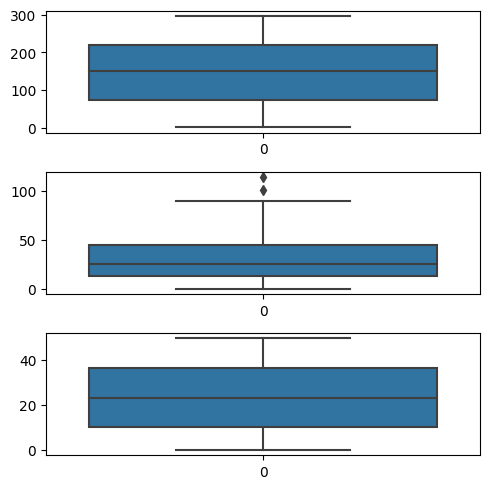

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

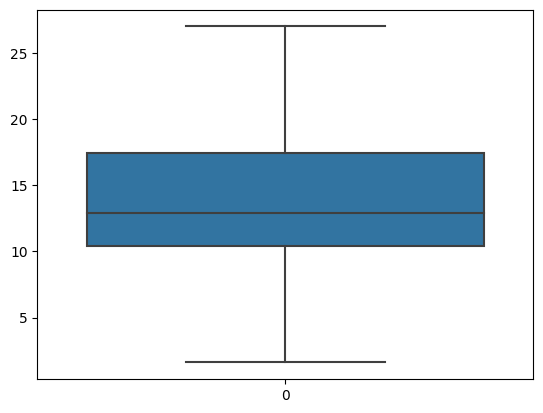

In [ ]:
sns.boxplot(data['Sales'])
plt.show()

In [ ]:
X = data['TV']
y = data['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()



In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           2.84e-30
Time:                        14:24:51   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

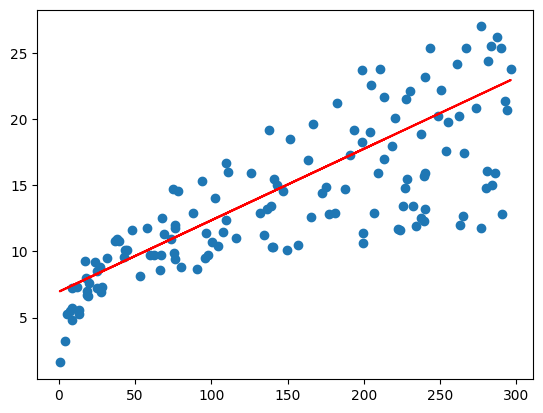

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

Model evaluation

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-31-723b49e70e34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


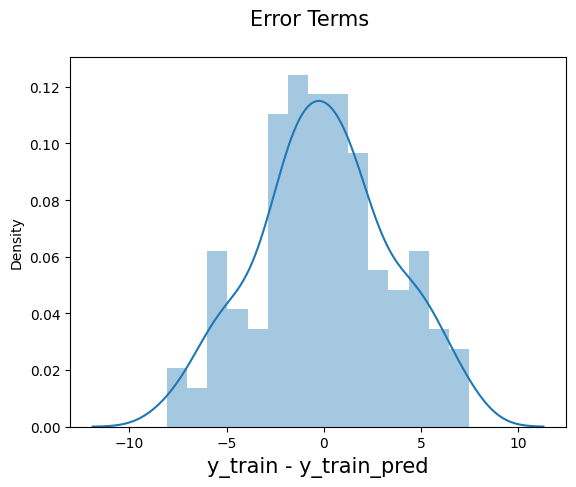

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

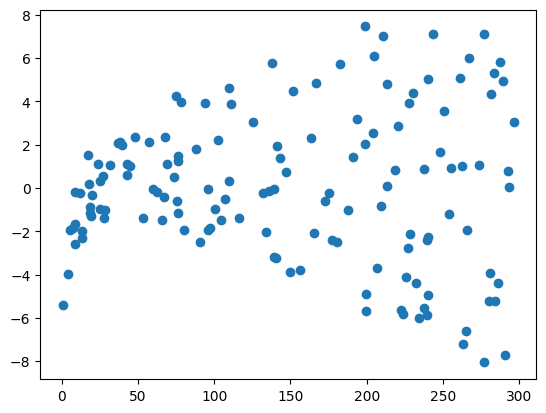

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R-squared:", r_squared)

Mean squared error: 7.9757985328548475
R-squared: 0.5942987267783303
